<a href="https://colab.research.google.com/github/sayanarajasekhar/PyTorch/blob/main/pytorch_linear_regression_model_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Model_0 - Used `nn.Parameter()` and manual test data creating

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1.1 Create data

In [2]:
weight = 0.7
bias = 0.3
start, end , step = 0, 1, 0.002

X = torch.arange(start, end, step)
y = weight * X + bias

len(X), len(y), X[:5], y[:5]

(500,
 500,
 tensor([0.0000, 0.0020, 0.0040, 0.0060, 0.0080]),
 tensor([0.3000, 0.3014, 0.3028, 0.3042, 0.3056]))

## 1.2 Split training and test data

In [3]:
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

## 1.3 Create linear regression model

In [4]:
class LinearRegressionModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.rand(1, dtype = torch.float), requires_grad = True)

  def forward(self, x):
    return self.weight * x + self.bias

## 1.4 Create model_0

In [5]:
torch.manual_seed(42)
model_0 = LinearRegressionModelV0()
model_0.state_dict()

OrderedDict([('weight', tensor([0.8823])), ('bias', tensor([0.9150]))])

## 1.5 Create loss function and optimizer

In [6]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.00001)

## 1.6 Create train and test loop

In [7]:
epochs = 500

for epoch in range(epochs):
  ## Train
  model_0.train()

  # 1. Forward pass
  train_preds = model_0(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. optimize step
  optimizer.step()

  ## Test
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_0(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 20 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

model_0.state_dict()

Epoch: 0 | Train Loss: 0.6877 | Test Loss: 0.7789
Epoch: 20 | Train Loss: 0.6875 | Test Loss: 0.7786
Epoch: 40 | Train Loss: 0.6873 | Test Loss: 0.7783
Epoch: 60 | Train Loss: 0.6870 | Test Loss: 0.7780
Epoch: 80 | Train Loss: 0.6868 | Test Loss: 0.7778
Epoch: 100 | Train Loss: 0.6866 | Test Loss: 0.7775
Epoch: 120 | Train Loss: 0.6863 | Test Loss: 0.7772
Epoch: 140 | Train Loss: 0.6861 | Test Loss: 0.7769
Epoch: 160 | Train Loss: 0.6859 | Test Loss: 0.7767
Epoch: 180 | Train Loss: 0.6856 | Test Loss: 0.7764
Epoch: 200 | Train Loss: 0.6854 | Test Loss: 0.7761
Epoch: 220 | Train Loss: 0.6852 | Test Loss: 0.7759
Epoch: 240 | Train Loss: 0.6849 | Test Loss: 0.7756
Epoch: 260 | Train Loss: 0.6847 | Test Loss: 0.7753
Epoch: 280 | Train Loss: 0.6845 | Test Loss: 0.7750
Epoch: 300 | Train Loss: 0.6842 | Test Loss: 0.7748
Epoch: 320 | Train Loss: 0.6840 | Test Loss: 0.7745
Epoch: 340 | Train Loss: 0.6838 | Test Loss: 0.7742
Epoch: 360 | Train Loss: 0.6836 | Test Loss: 0.7740
Epoch: 380 | Train

OrderedDict([('weight', tensor([0.8803])), ('bias', tensor([0.9100]))])

# 2. Model_1 - Used `nn.Linear()` and used `make_regression()` to create test data

In [8]:
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 2.1 Create data using make_regression

In [9]:
samples = 1000
features = 1

X, y = make_regression(n_samples = samples,
                       n_features = 1,
                       n_targets = 1,
                       random_state = 42)
len(X), len(y), X[0], y[0]

(1000, 1000, array([-1.20029641]), np.float64(-20.102874172998494))

## 2.2 Split training and test data

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim = 1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

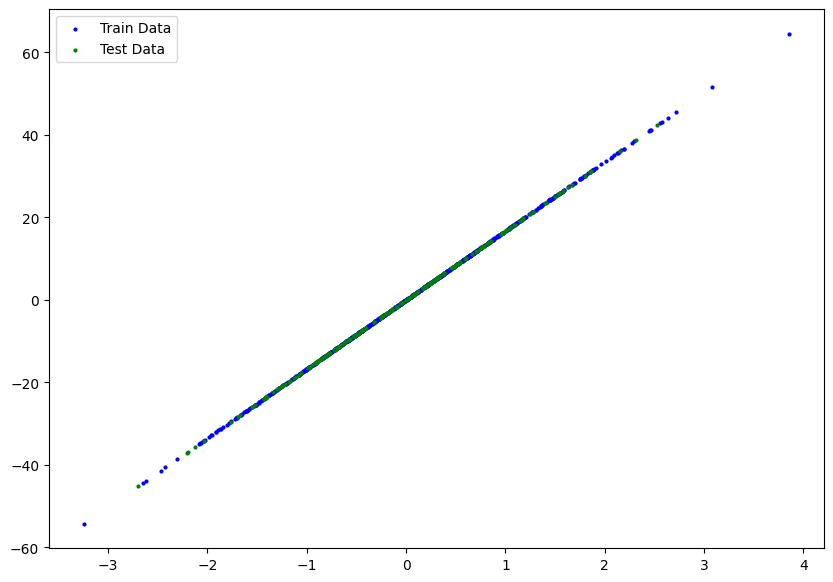

In [11]:
def plot_data(train_data = X_train,
              train_labels = y_train,
              test_data = X_test,
              test_labels = y_test,
              preds = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Train Data')
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test Data')
  if preds is not None:
    plt.scatter(test_data, preds, c = 'r', s = 4, label = 'Predications')
  plt.legend(prop = {'size': 10})

plot_data()

## 2.3 Create linear regression model

In [12]:
class LinearRegressionModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, x):
    return self.linear_layer(x)

## 2.4 Create model_1



In [13]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV1()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

## 2.5 Create loss function and optimizer

In [14]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.00001)

## 2.6 Create train and test loop

In [15]:
epochs = 500

for epoch in range(epochs):
  ## Train
  model_1.train()

  # 1. Forward pass
  train_preds = model_1(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_1(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 12.49033 | Test Loss: 12.33840
Epoch: 50 | Train Loss: 12.49003 | Test Loss: 12.33810
Epoch: 100 | Train Loss: 12.48972 | Test Loss: 12.33780
Epoch: 150 | Train Loss: 12.48942 | Test Loss: 12.33750
Epoch: 200 | Train Loss: 12.48911 | Test Loss: 12.33720
Epoch: 250 | Train Loss: 12.48881 | Test Loss: 12.33690
Epoch: 300 | Train Loss: 12.48850 | Test Loss: 12.33660
Epoch: 350 | Train Loss: 12.48820 | Test Loss: 12.33630
Epoch: 400 | Train Loss: 12.48789 | Test Loss: 12.33599
Epoch: 450 | Train Loss: 12.48759 | Test Loss: 12.33570


## 2.7 Compare model

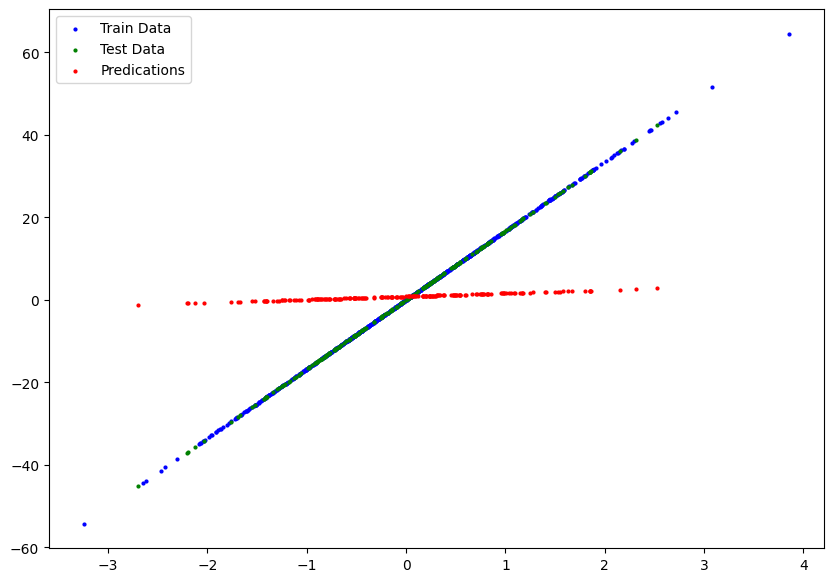

In [16]:
model_1.eval()
with torch.inference_mode():
  test_preds = model_1(X_test)

plot_data(preds = test_preds)

# 3. Model_2 - Createing test data with 2 features

In [17]:
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 3.1 Create data using make_regression with 2 features and 1 label

In [18]:
SAMPLES = 100
FEATURES = 2
LABELS = 1

X, y = make_regression(n_samples = SAMPLES,
                       n_features = FEATURES,
                       n_targets = LABELS,
                       shuffle = True,
                       random_state = 42)

len(X), len(y), X[0], y[0]

(100, 100, array([-1.60748323,  0.18463386]), np.float64(-127.35915354040701))

## 3.2 Split training and test data

In [19]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim = 1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

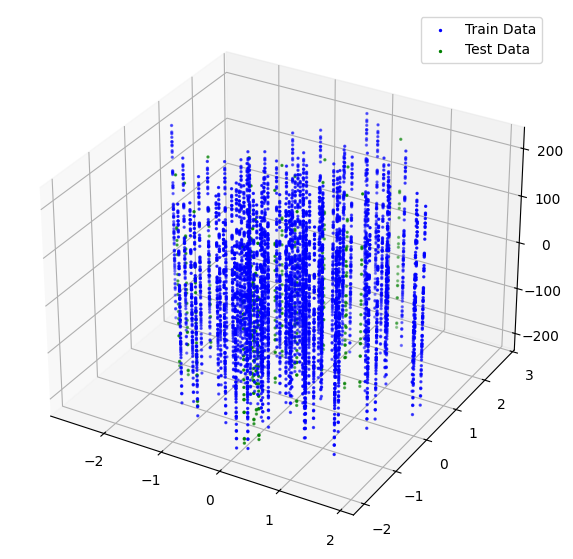

In [20]:
def plot_data_3d(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 preds = None):
  plt.figure(figsize=(10, 7))
  ax = plt.axes(projection = '3d')
  ax.scatter(X_train[:, 0], X_train[:, 1], y_train, c = 'b', s = 2, label = 'Train Data')
  ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c = 'g', s = 2, label = 'Test Data')
  ax.legend(prop = {'size': 10})

plot_data_3d()

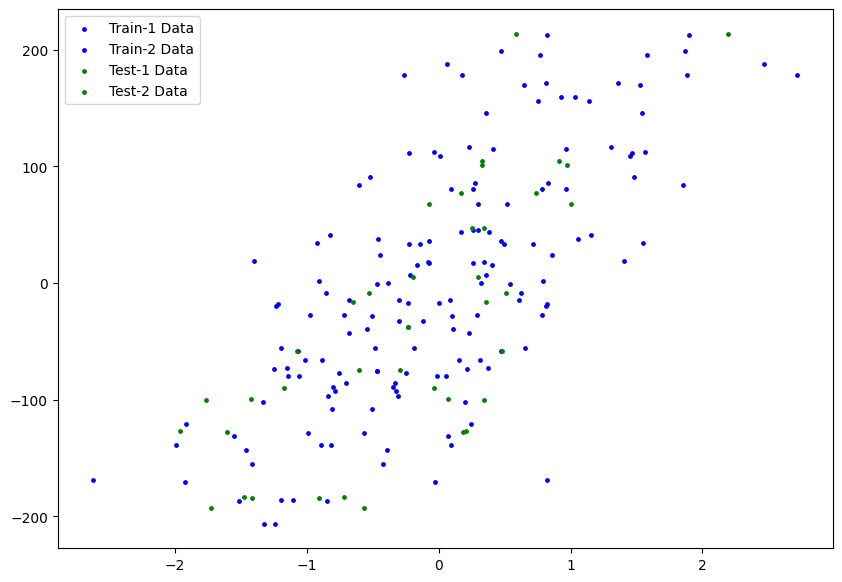

In [21]:
def plot_data_2d(train_data = X_train,
                 train_label = y_train,
                 test_data = X_test,
                 test_label = y_test,
                 preds = None):
  plt.figure(figsize = (10,7))
  plt.scatter(X_train[:,0], y_train, c = 'b', s = 6, label = 'Train-1 Data')
  plt.scatter(X_train[:,1], y_train, c = 'b', s = 6, label = 'Train-2 Data')
  plt.scatter(X_test[:,0], y_test, c = 'g', s = 6, label = 'Test-1 Data')
  plt.scatter(X_test[:,1], y_test, c = 'g', s = 6, label = 'Test-2 Data')

  if preds is not None:
    plt.scatter(X_test[:,0], preds, c = 'r', s = 6, label = 'Preds-1 Data')
    plt.scatter(X_test[:,1], preds, c = 'r', s = 6, label = 'Preds-2 Data')

  plt.legend(prop={'size': 10})

plot_data_2d()

## 3.3 Create linear regression model

In [22]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features = 2,
                                  out_features = 1,
                                  bias = True)

  def forward(self, x):
    return self.linear_layer(x)

## 3.4 Create model_2

In [23]:
torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5406, 0.5869]])),
             ('linear_layer.bias', tensor([-0.1657]))])

## 3.5 Create loss function and optimizer

In [24]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.00001)

## 3.6 Create train and test loop

In [25]:
epochs = 500

for epoch in range(epochs):
  ## Train
  model_2.train()

  # 1. Forward Pass
  train_preds = model_2(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_preds = model_2(X_test)

    # 2. Calcualte loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 85.84654 | Test Loss: 95.14095
Epoch: 50 | Train Loss: 85.84625 | Test Loss: 95.14061
Epoch: 100 | Train Loss: 85.84596 | Test Loss: 95.14029
Epoch: 150 | Train Loss: 85.84569 | Test Loss: 95.13996
Epoch: 200 | Train Loss: 85.84538 | Test Loss: 95.13963
Epoch: 250 | Train Loss: 85.84510 | Test Loss: 95.13929
Epoch: 300 | Train Loss: 85.84481 | Test Loss: 95.13895
Epoch: 350 | Train Loss: 85.84453 | Test Loss: 95.13863
Epoch: 400 | Train Loss: 85.84424 | Test Loss: 95.13830
Epoch: 450 | Train Loss: 85.84395 | Test Loss: 95.13796


## 3.7 Compare model

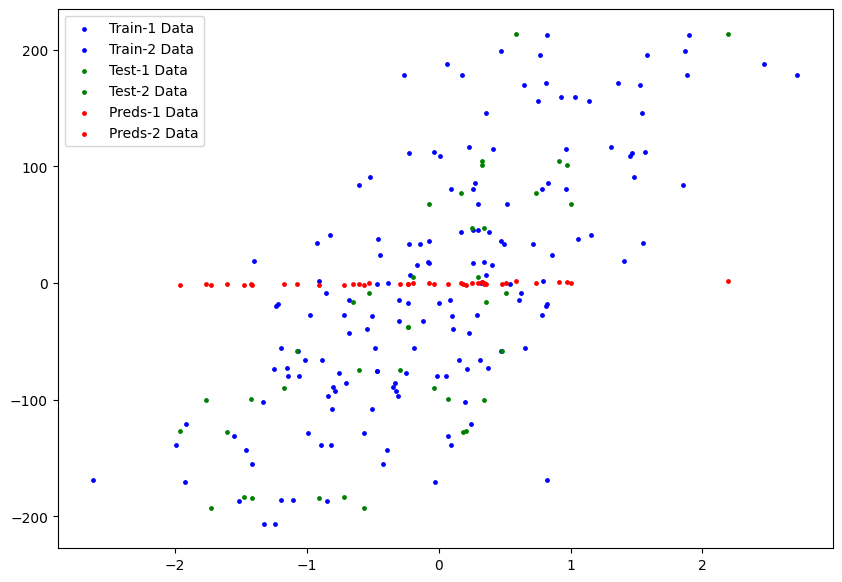

In [26]:
model_2.eval()
with torch.inference_mode():
  test_preds = model_2(X_test)

plot_data_2d(preds = test_preds)

# 4. Model_3 - Createing test data with 5 features and add nosie

In [28]:
import torch
from torch import nn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## 4.1 Create data using make_regression with 5 features and add noise

In [29]:
SAMPLES = 1000
FEATURES = 5

X, y = make_regression(n_samples=SAMPLES,
                       n_features=FEATURES,
                       bias = True,
                       shuffle=True,
                       noise=0.2,
                       random_state=42)

len(X), len(y), X[0], y[0]

(1000,
 1000,
 array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449]),
 np.float64(75.8638525346159))

## 4.2 Split training and test data

In [30]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float).unsqueeze(dim=1)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 4.3 Create linear regression model

In [31]:
class LinearRegressionModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features=5,
                                  out_features=1)

  def forward(self, x):
    return self.linear_layer(x)

## 4.4 Create model_3

In [32]:
torch.manual_seed(42)
model_3 = LinearRegressionModelV3()
model_3.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980]])),
             ('linear_layer.bias', tensor([0.0902]))])

## 4.5 Create loss function and optimizer

In [37]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr = 0.001)

## 4.6 Create train and test loop

In [41]:
epochs = 1000

for epoch in range(epochs):
  ## Train
  model_3.train()

  # 1. Forward pass
  train_preds = model_3(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_3.eval()

  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_3(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 50 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 100 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 150 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 200 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 250 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 300 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 350 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 400 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 450 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 500 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 550 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 600 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 650 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 700 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 750 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 800 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 850 | Train Loss: 0.16198 | Test Loss: 0.17040
Epoch: 900 | Train Loss: 0.1619

Model_3 training loss and test loss stuck at `0.16198` and `0.17040`

Creating model_4 with `nn.MSELoss` loss function

In [54]:
torch.manual_seed(42)
model_4 = LinearRegressionModelV3()
model_4.state_dict()

OrderedDict([('linear_layer.weight',
              tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980]])),
             ('linear_layer.bias', tensor([0.0902]))])

In [60]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.0001)

In [62]:
epochs = 1000

for epoch in range(epochs):
  ## Train
  model_4.train()

  # 1. Forward pass
  train_preds = model_4(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_4.eval()

  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_4(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 50 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 100 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 150 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 200 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 250 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 300 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 350 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 400 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 450 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 500 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 550 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 600 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 650 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 700 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 750 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 800 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 850 | Train Loss: 0.04242 | Test Loss: 0.04437
Epoch: 900 | Train Loss: 0.0424

Model_4 impoved when compaired with model_3 but training loss and test loss stuck at `0.04242` and `0.04436`

Creating model_5 with `nn.SmoothL1Loss` loss function

In [69]:
torch.manual_seed(42)
model_5 = LinearRegressionModelV3()

In [80]:
loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(params=model_5.parameters(), lr=0.001)

In [81]:
epochs = 1000

for epoch in range(epochs):
  ## Train
  model_5.train()

  # 1. Forward pass
  train_preds = model_5(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_5.eval()

  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_5(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 50 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 100 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 150 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 200 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 250 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 300 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 350 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 400 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 450 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 500 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 550 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 600 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 650 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 700 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 750 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 800 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 850 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 900 | Train Loss: 0.0212

Model_5 impoved when compaired with model 4 and model_3 but training loss and test loss stuck at `0.02121` and `0.02218`

* `Model_3 -> Train Loss: 0.16198 | Test Loss: 0.17040`
* `Model_4 -> Train Loss: 0.04242 | Test Loss: 0.04437`
* `Model_5 -> Train Loss: 0.02121 | Test Loss: 0.02218`

Let's create new linear regression model with hidden layers

In [82]:
class LinearRegressionModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearLayers = nn.Sequential(
        nn.Linear(in_features=5, out_features=10),
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self,x):
    return self.linearLayers(x)

In [85]:
torch.manual_seed(42)
model_6 = LinearRegressionModelV4()
model_6.state_dict()

OrderedDict([('linearLayers.0.weight',
              tensor([[ 0.3419,  0.3712, -0.1048,  0.4108, -0.0980],
                      [ 0.0902, -0.2177,  0.2626,  0.3942, -0.3281],
                      [ 0.3887,  0.0837,  0.3304,  0.0606,  0.2156],
                      [-0.0631,  0.3448,  0.0661, -0.2088,  0.1140],
                      [-0.2060, -0.0524, -0.1816,  0.2967, -0.3530],
                      [-0.2062, -0.1263, -0.2689,  0.0422, -0.4417],
                      [ 0.4039, -0.3799,  0.3453,  0.0744, -0.1452],
                      [ 0.2764,  0.0697,  0.3613,  0.0489, -0.1410],
                      [ 0.1202, -0.1213,  0.1882,  0.3993,  0.2585],
                      [-0.1955,  0.2582,  0.0800,  0.2271, -0.2726]])),
             ('linearLayers.0.bias',
              tensor([-0.4427, -0.1728, -0.3430,  0.3670,  0.1288,  0.1852,  0.1414, -0.0078,
                       0.3500, -0.3178])),
             ('linearLayers.1.weight',
              tensor([[ 0.0199, -0.2158,  0.0975, -0.10

In [90]:
loss_fn = nn.SmoothL1Loss()
optimizer = torch.optim.SGD(params=model_6.parameters(), lr=0.001)

In [91]:
epochs = 1000

for epoch in range(epochs):
  ## Train
  model_6.train()

  # 1. Forward pass
  train_preds = model_6(X_train)

  # 2. Calculate loss
  train_loss = loss_fn(train_preds, y_train)

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  train_loss.backward()

  # 5. Optimize step
  optimizer.step()

  ## Test
  model_6.eval()

  with torch.inference_mode():

    # 1. Forward pass
    test_preds = model_6(X_test)

    # 2. Calculate loss
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 50 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 100 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 150 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 200 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 250 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 300 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 350 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 400 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 450 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 500 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 550 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 600 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 650 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 700 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 750 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 800 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 850 | Train Loss: 0.02121 | Test Loss: 0.02218
Epoch: 900 | Train Loss: 0.0212